# Task 2 - TSF GRIP

In this task we are given a dataset of a sample super store and are required to perform exploratory data analysis to find out where more profits can be made in the superstore.

Importing neccesary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

To start off we will load the data from the .csv file and then we will proceed with the analysis of the data

In [31]:
file_path = 'C:/01_Adil Mubashir/16_Internships/The Sparks Foundation/Data Analysis/Task_3/SampleSuperstore.csv'
store_data = pd.read_csv(file_path)
print("\nPrinting the Head of the Data")
print(store_data.head(10))


Printing the Head of the Data
        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
5  Standard Class   Consumer  United States      Los Angeles  California   
6  Standard Class   Consumer  United States      Los Angeles  California   
7  Standard Class   Consumer  United States      Los Angeles  California   
8  Standard Class   Consumer  United States      Los Angeles  California   
9  Standard Class   Consumer  United States      Los Angeles  California   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.

As we can see in the head of the data above, there are several columns that can be of interest. In this task we are supposed to figure out how to make more profits so the first thing we will do is to sort and find average profit per category. This will give us an initial understanding of which categories of products are giving more profit and which do not.

In [70]:
store_data_category = store_data[["Category", "Sub-Category", "Profit"]] #subsetting data according to required columns
print(store_data_category.head()) 

          Category Sub-Category    Profit
0        Furniture    Bookcases   41.9136
1        Furniture       Chairs  219.5820
2  Office Supplies       Labels    6.8714
3        Furniture       Tables -383.0310
4  Office Supplies      Storage    2.5164


Now that we have subsetted the data we can proceed with extracting the values from it. This will give a general indication of how each category and subcategory is impacting our profits.

In [82]:
profit_data = store_data_category.groupby(['Category', 'Sub-Category'])['Profit'].agg([min, max, np.mean])
print(profit_data)

                                    min        max        mean
Category        Sub-Category                                  
Furniture       Bookcases    -1665.0522  1013.1270  -15.230509
                Chairs        -630.8820   770.3520   43.095894
                Furnishings   -427.4500   387.5676   13.645918
                Tables       -1862.3124   629.0100  -55.565771
Office Supplies Appliances   -1181.2824   793.7160   38.922758
                Art              0.1533   112.5740    8.200737
                Binders      -3701.8928  4946.3700   19.843574
                Envelopes        0.5508   204.0714   27.418019
                Fasteners      -11.8256    21.8880    4.375660
                Labels           0.6786   385.3752   15.236962
                Paper            1.0700   352.2960   24.856620
                Storage       -337.8060   792.2691   25.152277
                Supplies     -1049.3406   327.5060   -6.258418
Technology      Accessories    -75.5958   829.3754   54

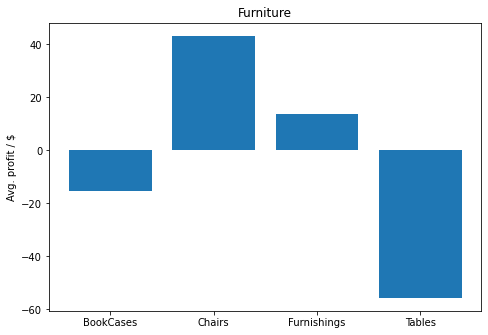

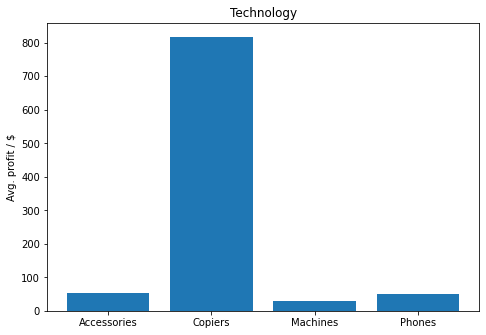

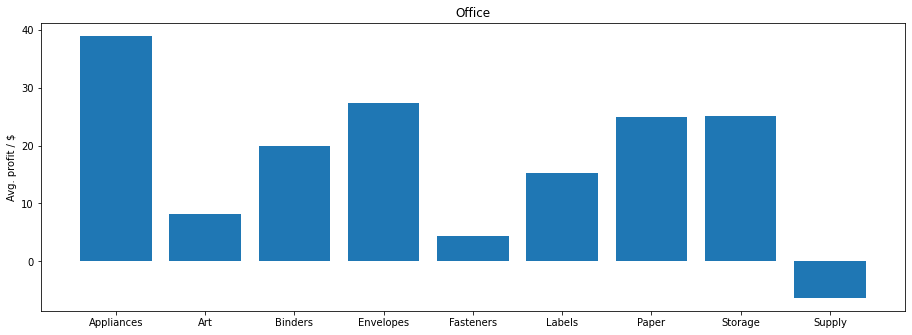

In [147]:
furniture_mean = profit_data.iloc[0:4, 2]
furniture_mean_values= []
for i in range(0,4):
    furniture_mean_values.append(furniture_mean[i])
furniture = ['BookCases', 'Chairs', 'Furnishings', 'Tables']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(furniture,furniture_mean_values)
plt.title("Furniture")
plt.ylabel('Avg. profit / $')
plt.show()

tech_mean = profit_data.iloc[13:17, 2]
tech_mean_values= []
for i in range(0,4):
    tech_mean_values.append(tech_mean[i])
tech = ['Accessories', 'Copiers', 'Machines', 'Phones']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(tech,tech_mean_values)
plt.title("Technology")
plt.ylabel('Avg. profit / $')
plt.show()

office_mean = profit_data.iloc[4:13, 2]
office_mean_values= []
for i in range(0,9):
    office_mean_values.append(office_mean[i])
office = ['Appliances', 'Art', 'Binders', 'Envelopes', 'Fasteners', 'Labels', 'Paper', 'Storage', 'Supply']
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(office,office_mean_values)
plt.title("Office")
plt.ylabel('Avg. profit / $')
plt.show()

As we can see overall the furniture category is performing the least in the store. On top of that the tables sub category has resulted in an average loss for the store, therefore they must be re-evaluated. 